# STAT576 Homework #1


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import Lasso

Load data “winequality-white.csv”.

- Make “quality” column as a target.

In [25]:
# loading data
data = pd.read_csv("C:\\Users\\ntlmp\\Desktop\\STAT576 Data Informatics\\Datasets\\winequality-white.csv", delimiter=';')

X = data.drop('quality', axis=1)

# setting quality as target variable
y = data['quality']

# scaling X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [26]:
print("Initial shape of data:", X.shape)

Initial shape of data: (4898, 11)


In [27]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [28]:
X_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.497106e-16,1.160543e-17,-1.066249e-16,3.133467e-16,-1.015476e-17,-4.642174e-17,3.247201e-14,-1.183754e-15,-8.218098e-16,-3.713739e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00


In [29]:
print(X.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  


In [30]:
print(X_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.172097         -0.081770     0.213280        2.821349  -0.035355   
1      -0.657501          0.215896     0.048001       -0.944765   0.147747   
2       1.475751          0.017452     0.543838        0.100282   0.193523   
3       0.409125         -0.478657    -0.117278        0.415768   0.559727   
4       0.409125         -0.478657    -0.117278        0.415768   0.559727   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.569932              0.744565  2.331512 -1.246921  -0.349184   
1            -1.253019             -0.149685 -0.009154  0.740029   0.001342   
2            -0.312141             -0.973336  0.358665  0.475102  -0.436816   
3             0.687541              1.121091  0.525855  0.011480  -0.787342   
4             0.687541              1.121091  0.525855  0.011480  -0.787342   

    alcohol  
0 -1.393152  
1 -0.824276  
2 -0.336667  


In [31]:
print(y.head())

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


# Problem 1: Feature Selection by Variance Threshold
Select features with a variance above a specified threshold (threshold = 0.1).


In [32]:
print(X.var())

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
dtype: float64


In [33]:
# applying variance threshold
thresholder = VarianceThreshold(threshold=0.1)
X_high_variance = thresholder.fit_transform(X)

# Convert the numpy array back to a DataFrame
# Retrieve the retained feature indices
features = thresholder.get_support(indices=True)
X_high_variance_df = pd.DataFrame(X_high_variance, columns=[X.columns[i] for i in features])

print("Shape of data after Variance Threshold:", X_high_variance_df.shape)
print(X_high_variance_df.head())

Shape of data after Variance Threshold: (4898, 5)
   fixed acidity  residual sugar  free sulfur dioxide  total sulfur dioxide  \
0            7.0            20.7                 45.0                 170.0   
1            6.3             1.6                 14.0                 132.0   
2            8.1             6.9                 30.0                  97.0   
3            7.2             8.5                 47.0                 186.0   
4            7.2             8.5                 47.0                 186.0   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  


# Problem 2. Feature Selection by Correlation Between Input Features
Remove features that are highly correlated with each other to avoid multicollinearity (threshold = 0.85).

In [34]:
# Calculate the correlation matrix
corr_matrix = X_scaled.corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.04939

Pairs with high correlation (|correlation| > 0.85):


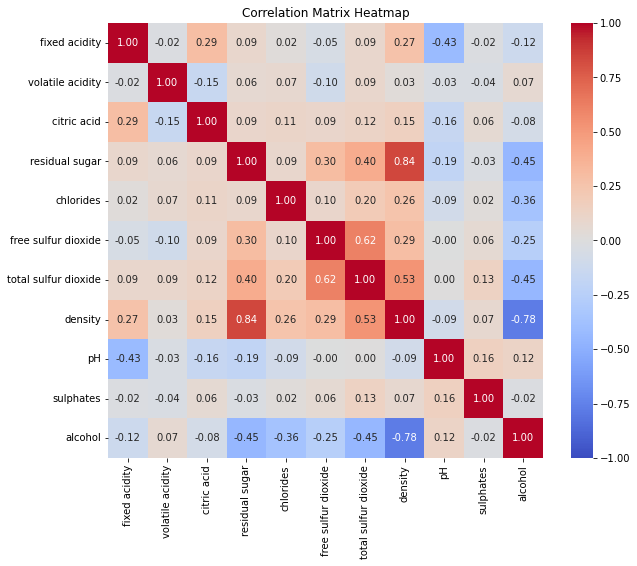

In [35]:
# Define threshold
threshold = 0.85

# Find pairs with high correlation
high_corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = corr_matrix.iloc[i, j]

# Print out high correlation pairs
print("Pairs with high correlation (|correlation| > {:.2f}):".format(threshold))
for pair, corr_value in high_corr_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {corr_value:.2f}")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

None of the features have correlation coefficients above the threshold.

# Problem 3: Feature Selection by Random Forest
Train a Random Forest classifier and select features based on their importance scores (choose top 5).

In [36]:
# --- 3. Random Forest (Select Top 5 Features) ---
print("3. Random Forest Feature Selection (Top 5 Features by Importance)")
rf_model = RandomForestRegressor(random_state=42) # numeric target, so use RandomForestRegressor
rf_model.fit(X_scaled, y)
importances_rf = rf_model.feature_importances_

# Select the top 5 features based on feature importance
top_5_rf = np.argsort(importances_rf)[-5:]  # Get indices of top 5 features
selected_features_rf = X.columns[top_5_rf]
print(f"Top 5 features by Random Forest: {selected_features_rf.tolist()}\n")

3. Random Forest Feature Selection (Top 5 Features by Importance)
Top 5 features by Random Forest: ['residual sugar', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'alcohol']



# Problem 4: Feature Selection by Linear Regression via P-Value
Perform feature selection using linear regression and selecting features with a p-value below a specified threshold (threshold = 0.05).

In [37]:
# --- 4. Linear Regression (Select Top Features) ---
print("4. Feature Selection by Linear Regression (Top Features by P-Value)")
X_with_const = sm.add_constant(X_scaled)  # Add intercept term

# Fit the model and calculate p-values without printing the optimization process
linear_reg_model = sm.OLS(y, X_with_const).fit(maxiter=500, disp=False)
p_values = linear_reg_model.pvalues[1:]  # Ignore the constant term

# Select the top 5 features based on p-value ranking
threshold = 0.05 # setting p-value threshold
selected_features_linear_reg = X.columns[p_values < threshold]
print(f"Top features by Linear Regression (p-value): {selected_features_linear_reg.tolist()}\n")

4. Feature Selection by Linear Regression (Top Features by P-Value)
Top features by Linear Regression (p-value): ['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']



In [38]:
print(linear_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:52:34   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8779 

# Problem 5: Feature Selection by Linear Regression with L1 Regularization
Use L1-regularized linear regression (Lasso) to select important features by driving some coefficients to zero (alpha = 0.1).

In [39]:
print("5. Lasso Regression Feature Selection (Top Features by Coefficient Magnitude)")
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_scaled, y)

# Select the top 5 features based on coefficient magnitudes (absolute values)
coef_lasso = np.abs(lasso_model.coef_)
selected_features_lasso = X_scaled.columns[coef_lasso != 0]
print(f"Top features by Lasso Regression: {selected_features_lasso.tolist()}\n")
print(f"Feature Coefficients:\n{coef_lasso}")

5. Lasso Regression Feature Selection (Top Features by Coefficient Magnitude)
Top features by Lasso Regression: ['volatile acidity', 'alcohol']

Feature Coefficients:
[0.         0.09220785 0.         0.         0.         0.
 0.         0.         0.         0.         0.29196651]
